In [36]:
import numpy as np
import pandas as pd

In [37]:
data= pd.read_csv('Titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
# data = data.drop(['PassengerId','Name','Cabin','Ticket','Embarked'],axis=1)
data.drop(columns=['PassengerId','Name','Cabin','Ticket','Embarked'],inplace=True)
# data.head(
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [39]:
# data.fillna(data.mean(), inplace=True)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


Preprocessing

In [ ]:
# data.fillna(data.mean(), inplace=True)
# data['Sex'] = data['Sex'].map({'male': 1, 'female': 0})
data['Sex'].map({'male':1,'female':0})

data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [ ]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [ ]:
def loss_function(y,y_pred):
    m = len(y)
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
    
    loss = -1/m * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return loss

In [ ]:
def logistic_regression(X,y,lr=0.01,epochs=1000):
    n_samples,n_features =X.shape
    w= np.zeros(n_features)
    b=0
    costs= []
    pred_y =[]
    for epoch in range(epochs):
        z=np.dot(X,w)+b
        y_pred =sigmoid(z)

        dw= (1/n_samples)*np.dot(X.T,(y_pred-y))
        db= (1/n_samples)*np.sum(y_pred -y)

        w-=lr*dw
        b-=lr*db

        if epoch%100==0:
            loss=loss_function(y,y_pred)
            costs.append(loss)
            pred_y.append(y_pred)
            print(f"Epoch {epoch}, Loss: {loss:.4f}")
        pred_y.append(y_pred)
    return w,b,costs,pred_y

In [ ]:
import numpy as np
import pandas as pd

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(X, y, w, b):
    n = np.shape(y)[0]
    z = np.dot(X, w) + b
    pred = sigmoid(z)
    
    prediction_class = [1 if p >= 0.5 else 0 for p in pred]
    df = pd.DataFrame(prediction_class, columns=['preed'])
    
    y = np.array(y)
    df_pred = np.array(df['preed'])
    
    misses = np.sum(np.abs(y - df_pred))
    acc = (n - misses) / n
    
    print(f"Accuracy of the model: {acc * 100:.2f}%")


Epoch 0, Loss: 0.6931
Epoch 100, Loss: 0.6810
Epoch 200, Loss: 0.6738
Epoch 300, Loss: 0.6694
Epoch 400, Loss: 0.6668
Epoch 500, Loss: 0.6652
Epoch 600, Loss: 0.6643
Epoch 700, Loss: 0.6637
Epoch 800, Loss: 0.6633
Epoch 900, Loss: 0.6631
Weights : [-0.00232086 -0.01411981] bias: -0.0003785741945935535
Accuracy of the model: 64.25%


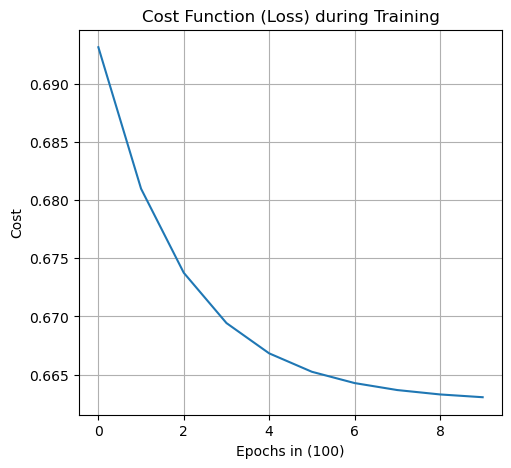

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

SX = data[['Pclass','Age']]
Sy =data['Survived']

SX.reset_index(drop=True)
Sy.reset_index(drop=True)
X_train,X_test,y_train,y_test =train_test_split(SX,Sy,test_size=0.2,random_state=23)

w,b,costs,y_pred = logistic_regression(X_train,y_train,0.00001,1000)

print(f"Weights : {w} bias: {b}")
predict(X_test,y_test,w,b)

# Plot the cost function (loss)
plt.figure(figsize=(12, 5))

# Plot cost function
plt.subplot(1, 2, 1)
plt.plot(range(10), costs, label="Cost Function")
plt.xlabel("Epochs in (100)")
plt.ylabel("Cost")
plt.title("Cost Function (Loss) during Training")
plt.grid(True)


MULTILOGISTIC REGRESSION

In [ ]:
ir=pd.read_csv('Iris.csv')
print(ir)

FileNotFoundError: [Errno 2] No such file or directory: 'Iris.csv'